# Merge Sort Sort

Rock Boynton | CS 3851

## Introduction

In this lab, the merge sort algorithm is implemented using Python. It is then benchmarked on lists of numbers.

There are 3 cases evaluated:

1. The list is randomly permuted

2. The list is already sorted

3. The list is sorted in reverse order

For each case, the merge sort algorithm is benchmarked with lists of 100, 1,000, 10,000, and 100,000 random numbers. Each list is ran and timed for 10 trials, with the average calculated. Finally, each case is plotted using Matplotlib as List Size (log10) vs Running Time (s)

Then, merge sort is directly compared against insertion sort for best-, worst-, and average-cases plotted using Matplotlib as List Size (log10) vs Running Time (s).

 ## Summary of Results

As determined theoretically, the best-, worst-, and average-case runtimes were all $O(n*logn)$. It was a litle surprising how much faster this algorithm is versus insertion sort, where it completely crushed it in all cases except the bes-case (already sorted). But that makes sense because insertion sort is $O(n)$ for the best-case.

---

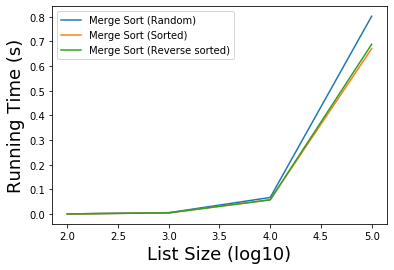

In [1]:
import sorting

import random
import time 
import numpy as np
import matplotlib.pyplot as plt


def benchmark(case):
    total_time_avgs = []
    numbers = [100, 1000, 10000, 100000]
    n_trials = 10
    for n in numbers:
        times = []
        for i in range(n_trials):
            lst = [random.random() for _ in range(n)]
            if case == 'random':
                random.shuffle(lst)
            elif case == 'sorted':
                list.sort(lst)
            elif case == 'reverse sorted':
                list.sort(lst)
                list.reverse(lst)
            start = time.clock()
            sorting.merge_sort(lst, 0, len(lst) - 1)
            end = time.clock()
            elapsed = end - start
            times.append(elapsed)
        total_time_avgs.append(np.mean(times))
    plt.plot(np.log10(numbers), total_time_avgs, label=f'Merge Sort ({case.capitalize()})')
    plt.xlabel('List Size (log10)', fontsize=18)
    plt.ylabel('Running Time (s)', fontsize=18)
    plt.legend()

    
benchmark(case='random')
benchmark(case='sorted')
benchmark(case='reverse sorted')

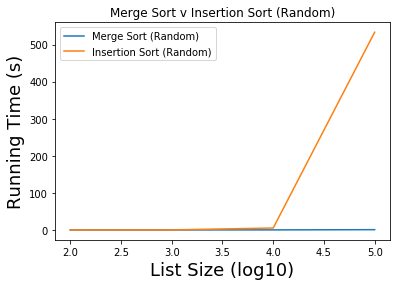

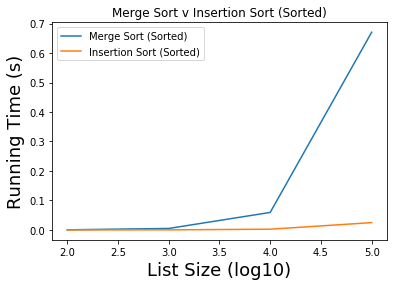

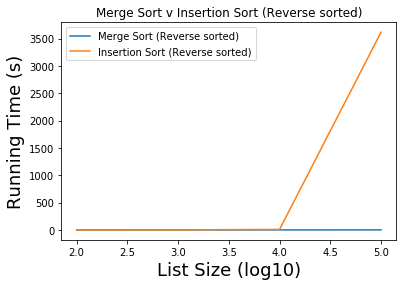

In [5]:
def compare_to_insertion_sort(case):
    merge_total_time_avgs = []
    insertion_total_time_avgs = []
    numbers = [100, 1000, 10000, 100000]
    n_trials = 10
    for n in numbers:
        merge_times = []
        insertion_times = []
        for i in range(n_trials):
            merge_lst = [random.random() for _ in range(n)]
            if case == 'random':
                random.shuffle(merge_lst)
            elif case == 'sorted':
                list.sort(merge_lst)
            elif case == 'reverse sorted':
                list.sort(merge_lst)
                list.reverse(merge_lst)
            insertion_lst = merge_lst[:]

            start = time.clock()
            sorting.merge_sort(merge_lst, 0, len(merge_lst) - 1)
            end = time.clock()
            elapsed = end - start
            merge_times.append(elapsed)

            start = time.clock()
            sorting.insertion_sort(insertion_lst)
            end = time.clock()
            elapsed = end - start
            insertion_times.append(elapsed)

        merge_total_time_avgs.append(np.mean(merge_times))
        insertion_total_time_avgs.append(np.mean(insertion_times))
    plt.plot(np.log10(numbers), merge_total_time_avgs, label=f'Merge Sort ({case.capitalize()})')
    plt.plot(np.log10(numbers), insertion_total_time_avgs, label=f'Insertion Sort ({case.capitalize()})')
    plt.xlabel('List Size (log10)', fontsize=18)
    plt.ylabel('Running Time (s)', fontsize=18)
    plt.legend()
    plt.title(f'Merge Sort v Insertion Sort ({case.capitalize()})')
    plt.show()


compare_to_insertion_sort(case='random')
compare_to_insertion_sort(case='sorted')
compare_to_insertion_sort(case='reverse sorted')

## Questions

1. Were there any differences between the run times of the three cases for merge sort? What inputs gave the best-, worst-, and average-case runs time?

    * There were only slight differences in the run times of the best-, worst-, and average-case. The best case (already sorted) was only slightly better    and the worst- and average-case were indistinguishable. This is because the time complexity is $O(n*logn)$ for all cases.

2. Why do you think the different inputs caused different run times for merge sort?

    * The best-case (sorted) was slightly faster than the other cases because there was no swaps performed. So, although the same number of comparisons is made in each case making all cases $O(n*logn)$, the amount of comparisons is not, and comparisons do take time to perform.

3. Look up the best-, worst-, and average-case run time of merge sort in big-oh notation and provide those. Are the formally determined run times consistent with your benchmarks?

    * Best-, worst-, and average case are all $O(n*logn)$ which is consistent with my benchmarks

4. Were there any differences between the run times of the three cases for insertion sort vs merge sort?

    * Merge sort is **much** faster than insertion sort in the worst- and average-cases. However, merge sort is slower than insertion sort in the best-case. 

5. Why do you think the different inputs caused different run times for insertion sort vs merge sort? Why do you think the best-case run time of insertion sort is faster than merge sort?

    * The different inputs caused different runtimes due to the design of the respective algorithms. Insertions sort is $O(n^2)$ for the worst- and average- cases but merge sort is $O(n*logn)$, so it makes sense merge sort would be faster in those cases. However, insertion sort is $O(n)$ for the best-case so it is no surprise it is faster than merge sort which is still $O(n*logn)$ for the best case.

6. Are the formally determined run times (in terms of big-oh) consistent with your benchmarks?

    * Yes.
